In [3]:
## Linear regression
# https://en.wikipedia.org/wiki/Linear_regression

# Assume data is part of a function and fits a curve that passes close to those data points
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [5]:
# grab scikitlearn dataset for boston houses
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [7]:
print boston.DESCR # the target is the price of the house

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

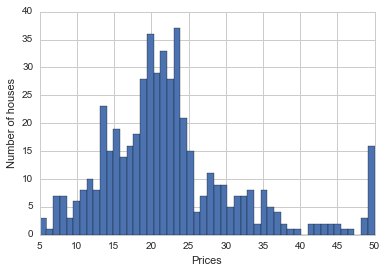

In [8]:
# do a quick visualization of the data
# this target method works because its a toy dataset
plt.hist(boston.target, bins=50)
plt.xlabel('Prices')
plt.ylabel('Number of houses')

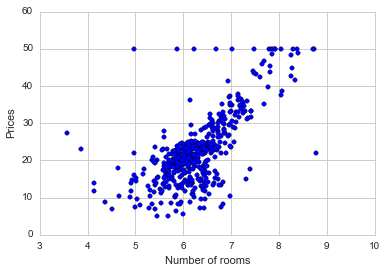

In [9]:
# lets look at a scatter plot of rooms in the house to price
# number of rooms is the 6th element x = 5th row, y = target
plt.scatter(boston.data[:,5], boston.target)
plt.xlabel('Number of rooms')
plt.ylabel('Prices')
# clearly more rooms more moneys

In [10]:
# lets use pandas to put this stuff in data frames
boston_df = DataFrame(boston.data)

# built int methods**
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [11]:
# add a new column that incudes prices
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


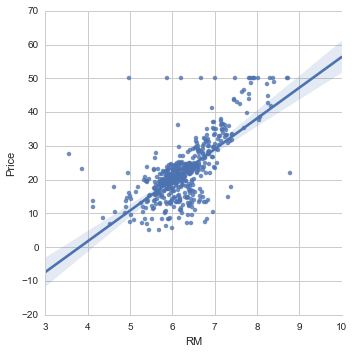

In [12]:
# now we can use a linear fit
sns.lmplot('RM','Price', data=boston_df)
# same as before, but we can add a linear fit

In [13]:
# Now lets look at least squares method
# How are we finding the best fit line?

In [14]:
# the best fit line is the only with the less distance squared... obviously

In [15]:
x = boston_df.RM
# we need a feature and attributes format
x = np.vstack(boston_df.RM)
x.shape

(506, 1)

In [16]:
y = boston_df.Price
y.shape

(506,)

We want a y=mx+b

so we need to use matrices : y = Ap
where : A = [x 1]
and : p = [m]
          [b]

In [31]:
# create an array in the form of [x 1]
x = np.array( [ [value, 1] for value in x])

# now we have 1 attached to every attribute
x

array([[ 6.575,  1.   ],
       [ 6.421,  1.   ],
       [ 7.185,  1.   ],
       ..., 
       [ 6.976,  1.   ],
       [ 6.794,  1.   ],
       [ 6.03 ,  1.   ]])

In [27]:
# least squares method
m,b = np.linalg.lstsq(x,y)[0]
m,b

(9.1021089811803151, -34.670620776438582)

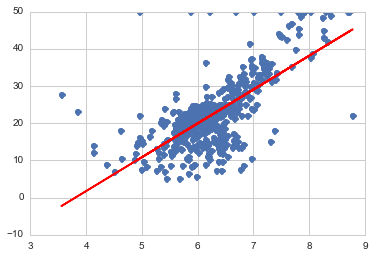

In [28]:
# plot this bad boy
plt.plot(boston_df.RM, boston_df.Price,'o')
# also plot the best fit line
x = boston_df.RM

plt.plot(x, m*x + b, 'r', label='Best Fit Line')

# recreate what we got up there

In [32]:
# find error of our fitted line, Root mean squared error of our fitted line

result = np.linalg.lstsq(x,y)

total_error = result[1]

rmse = np.sqrt(total_error/len(x))

print "The rsme is %.2f" %rmse

The rsme is 6.60


In [33]:
# 6.60, 95% of the time we are within 6.60 of the line so +- 6'600$

Now use scikit learn to do multivariate regression

In [34]:
import sklearn
from sklearn.linear_model import LinearRegression

In [35]:
# create linear regression object
lreg = LinearRegression()
lreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
# we will user the fit() and predict()
x_multi = boston_df.drop('Price',1)
y_target = boston_df.Price

In [37]:
# pass in x and y
lreg.fit(x_multi, y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
print 'Estimated intercept coefficient %.2f' %lreg.intercept_
print 'Number of coefficients %2.f' %len(lreg.coef_)

Estimated intercept coefficient 36.49
Number of coefficients 13


In [42]:
# set up Dataframe to see relationship
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

coeff_df # the coefficient of each of the features

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329
